# Retail Analysis with Walmart Data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Walmart_Store_sales.csv')

In [4]:
data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [6]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
data.shape

(6435, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
data.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [10]:
from datetime import datetime
data['Date']=pd.to_datetime(data['Date'],format='mixed')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


## store has maximum sales

In [13]:
Max_sales = data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=0)

In [14]:
Max_sales

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

In [15]:
pd.DataFrame(Max_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


In [16]:
pd.DataFrame(Max_sales).tail(1)

,Weekly_Sales
Store,
33,37160222.0


#### Observation

Store 20 records highest sale of value 301,397,792. And store 33 records lowest sale 37,160,222

## store has maximum standard deviation

In [19]:
Stddv_sales = data.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=0)

In [20]:
Stddv_sales

Store
14    317570.0
10    302262.0
20    275901.0
4     266201.0
13    265507.0
23    249788.0
27    239930.0
2     237684.0
39    217466.0
6     212526.0
35    211243.0
19    191723.0
41    187907.0
28    181759.0
18    176642.0
24    167746.0
11    165834.0
22    161251.0
1     155981.0
12    139167.0
32    138017.0
45    130169.0
21    128753.0
31    125856.0
15    120539.0
40    119002.0
25    112977.0
7     112585.0
17    112163.0
26    110431.0
8     106281.0
34    104630.0
29     99120.0
16     85770.0
9      69029.0
36     60725.0
42     50263.0
3      46320.0
38     42768.0
43     40598.0
5      37738.0
44     24763.0
33     24133.0
30     22810.0
37     21837.0
Name: Weekly_Sales, dtype: float64

In [21]:
pd.DataFrame(Stddv_sales).head(1)

,Weekly_Sales
Store,
14,317570.0


In [22]:
pd.DataFrame(Stddv_sales).tail(1)

,Weekly_Sales
Store,
37,21837.0


In [51]:
store14 = data[data.Store==14].Weekly_Sales

In [53]:
store14

1859    2623469.95
1860    1704218.84
1861    2204556.70
1862    2095591.63
1863    2237544.75
           ...    
1997    1522512.20
1998    1687592.16
1999    1639585.61
2000    1590274.72
2001    1704357.62
Name: Weekly_Sales, Length: 143, dtype: float64

In [55]:
cv_store14=store14.std()/store14.mean()*100
cv_store14.round(2)

15.71

##  store/s has good quarterly growth rate in Q3’2012

In [58]:
Q2_sales=data[(data['Date']>='2012-04-01')&(data['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()
Q3_sales=data[(data['Date']>='2012-07-01')&(data['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [68]:
pd.DataFrame({'Q2_sales':Q2_sales,'Q3_sales':Q3_sales,'Difference':(Q3_sales-Q2_sales),
             'growth_rate':((Q3_sales-Q2_sales)/Q3_sales)*100}).sort_values(by=['growth_rate'], ascending=0).head(5)

,Q2_sales,Q3_sales,Difference,growth_rate
Store,,,,
16,6626133.0,6441311.0,-184822.0,-2.869323
7,7613594.0,7322394.0,-291200.0,-3.976841
35,10753571.0,10252123.0,-501448.0,-4.891163
26,13218290.0,12417575.0,-800715.0,-6.448240
39,20191586.0,18899955.0,-1291631.0,-6.834043


## holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [76]:
#Holiday Events 
Super_Bowl= ['12-2-2010', '11-2-2011', '10-2-2012', '8-2-2013']
Labour_Day= ['10-9-2010', '9-9-2011', '7-9-2012', '6-9-2013'] 
Thanksgiving= ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013'] 
Christmas= ['31-12-2010', '30-12-2011', '28-12-2012', '27-11-2013']

In [78]:
Super_Bowl_sales=data.loc[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean().round()
Labour_Day_sales=data.loc[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean().round()
Thanksgiving_sales=data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round()
Christmas_sales=data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean().round()

In [80]:
print(Super_Bowl_sales)
print(Labour_Day_sales)
print(Thanksgiving_sales)
print (Christmas_sales)


1079128.0
1042427.0
1471273.0
960833.0


In [82]:
non_holiday_sales=data[(data['Holiday_Flag']==0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [84]:
difference_holidays=pd.DataFrame([{'Super_Bowl_sales':Super_Bowl_sales,
                                   'Labour_Day_sales':Labour_Day_sales,
                                   'Thanksgiving_sales':Thanksgiving_sales,
                                   'Christmas_sales':Christmas_sales,
                                   'non_holiday_sales':non_holiday_sales}])

In [86]:
difference_holidays

,Super_Bowl_sales,Labour_Day_sales,Thanksgiving_sales,Christmas_sales,non_holiday_sales
0,1079128.0,1042427.0,1471273.0,960833.0,1041256.38


## monthly view of sales in units and give insights

In [88]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [92]:
monthly_sales = data.groupby('Month')['Weekly_Sales'].sum().reset_index()

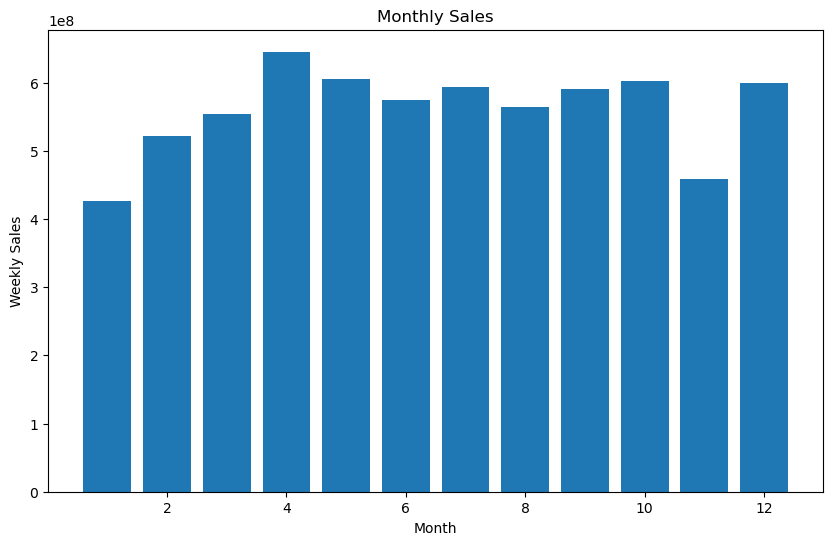

In [94]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Monthly Sales')
plt.show()

## Semester view of sales in units and give insights

In [102]:
# Group the data by Semester and calculate the total sales
semester1_sales = data[data['Month'].isin([1, 2, 3, 4, 5, 6])]['Weekly_Sales'].sum()
semester2_sales = data[data['Month'].isin([7, 8, 9, 10, 11, 12])]['Weekly_Sales'].sum()

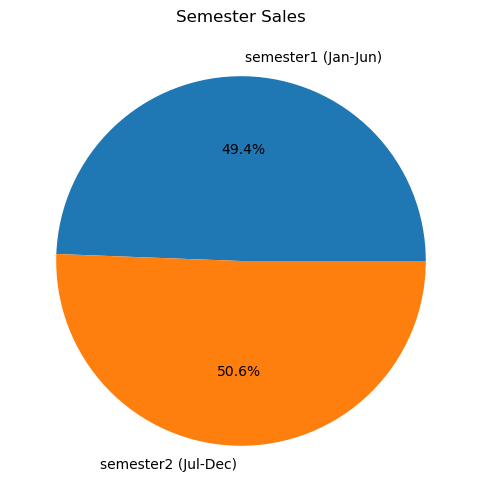

In [106]:
plt.figure(figsize=(8, 6))
plt.pie([semester1_sales, semester2_sales], labels=['semester1 (Jan-Jun)', 'semester2 (Jul-Dec)'], autopct='%1.1f%%')
plt.title('Semester Sales')
plt.show()

## Build  prediction models to forecast demand

In [110]:
import statsmodels.formula.api as sm
model=sm.ols(formula='Weekly_Sales~CPI+Fuel_Price+Unemployment',data=data).fit()

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     51.75
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           4.81e-33
Time:                        09:12:00   Log-Likelihood:                -94275.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6431   BIC:                         1.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.746e+06   7.96e+04     21.938      0.000    1.59e+06     1.9e+06
CPI          -1696.8760    188.793     -8.988      0.000   -2066.973   -1326.779
Fuel_Price   -1.927e+04   1.54e+04     -1.248      0.212   -4.95e+04     1.1e+04
Unemployment -4.286e+04   3905.197    -10.975      0.000   -5.05e+04   -3.52e+04
==============================================================================
Omnibus:                      370.117   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.792
Skew:                           0.638   Prob(JB):                     1.42e-95
Kurtosis:                       3.051   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""